In [156]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [158]:
# 1. Importation des données
data = pd.read_csv('./villes.csv', sep=';')
X = data.iloc[:, 1:13].values
labels = data.iloc[:, 0].values

In [160]:
# 2. Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Application de l'ACP
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [162]:
# a) Determiner le nombre d'axes à conserver pour 90% de la variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)  # Somme cumulée des variances expliquées
num_components = np.argmax(explained_variance >= 0.90) + 1  # Le nombre minimum de composants
print(f"Nombre de composantes principales à retenir pour 90% de l'information: {num_components}")

Nombre de composantes principales à retenir pour 90% de l'information: 2


In [164]:
# b) Interprétation des deux premiers axes principaux :
# - PC1 oppose les villes chaudes aux villes froides selon leur température moyenne annuelle.  
# - PC2 distingue les villes ayant une forte variation saisonnière (climat continental)  
#   de celles avec une variation modérée (climat océanique ou méditerranéen).
print(pca.explained_variance_ratio_)
print("Variance expliquée par les deux premiers axes:")
print(f"Axe 1: {pca.explained_variance_ratio_[0] * 100:.2f}%")
print(f"Axe 2: {pca.explained_variance_ratio_[1] * 100:.2f}%")

[0.87268193 0.11720602 0.00469563 0.00264791 0.00113528 0.00050136
 0.00042289 0.00032817 0.00015166 0.00011764 0.00008364 0.00002786]
Variance expliquée par les deux premiers axes:
Axe 1: 87.27%
Axe 2: 11.72%


In [166]:
#Récupération des composantes principales
composantes = pca.components_

#Affichage des coefficients des deux premières composantes
print("Coefficients des deux premiers axes principaux :")
df_composantes = pd.DataFrame(composantes[:2], columns=data.columns[1:13], index=['PC1', 'PC2'])
print(df_composantes)

Coefficients des deux premiers axes principaux :
         janv       fev      mars     avril       mai      juin      juil  \
PC1  0.271510  0.288462  0.301081  0.303542  0.283531  0.278419  0.272903   
PC2  0.399335  0.299072  0.129431 -0.115306 -0.323143 -0.358468 -0.388796   

         aout      sept       oct       nov       dec  
PC1  0.287578  0.304720  0.303855  0.292428  0.272955  
PC2 -0.301013 -0.112316  0.122492  0.262695  0.386937  


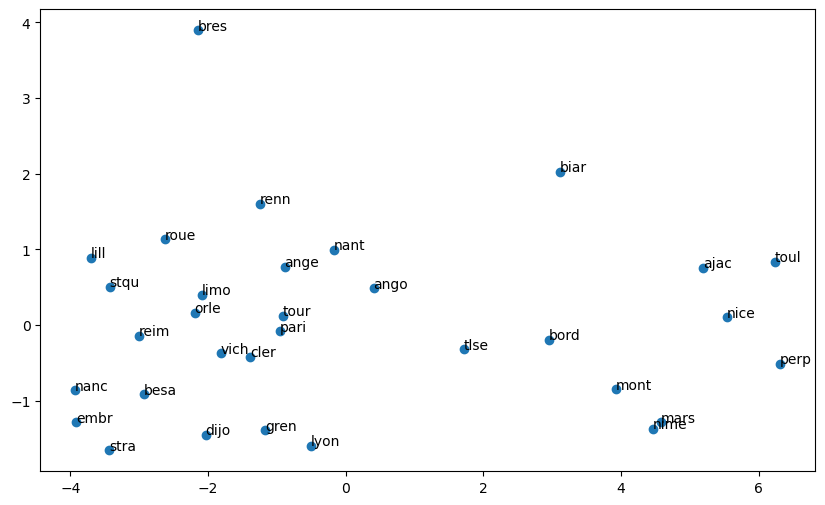

In [168]:
# c) Visualisation de la projection des villes dans le plan des deux premières composantes
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
for l, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(l, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

In [170]:
# d) Analyse des positions et oppositions des villes sur le plan projeté
"""
Les villes du sud (comme Nice, Marseille) sont généralement plus éloignées des villes du nord (comme Lille, Paris), car elles ont un climat plus chaud.
Les villes côtières (comme Brest, Toulon) se distinguent des villes intérieures (comme Clermont-Ferrand), en raison de l’influence tempérée de la mer sur le climat.
Les villes avec un climat continental (Strasbourg, Lyon) ont des positions opposées à celles avec un climat méditerranéen ou océanique (Nantes, Montpellier), car leurs températures varient plus fortement.
Les régions méditerranéennes (villes comme Marseille, Nice) sont caractérisées par des températures douces et chaudes.
Les régions atlantiques (Brest, Nantes) ont un climat tempéré par l’océan.
Les régions continentales (Strasbourg, Lyon) présentent des hivers froids et des étés chauds.
Les villes du nord (Lille, Paris) sont plus froides en hiver et moins chaudes en été.
"""

'\nLes villes du sud (comme Nice, Marseille) sont généralement plus éloignées des villes du nord (comme Lille, Paris), car elles ont un climat plus chaud.\nLes villes côtières (comme Brest, Toulon) se distinguent des villes intérieures (comme Clermont-Ferrand), en raison de l’influence tempérée de la mer sur le climat.\nLes villes avec un climat continental (Strasbourg, Lyon) ont des positions opposées à celles avec un climat méditerranéen ou océanique (Nantes, Montpellier), car leurs températures varient plus fortement.\nLes régions méditerranéennes (villes comme Marseille, Nice) sont caractérisées par des températures douces et chaudes.\nLes régions atlantiques (Brest, Nantes) ont un climat tempéré par l’océan.\nLes régions continentales (Strasbourg, Lyon) présentent des hivers froids et des étés chauds.\nLes villes du nord (Lille, Paris) sont plus froides en hiver et moins chaudes en été.\n'

In [172]:
def analyse_pca(data, columns_to_analyze, separator=';', seuil_variance=0.9):
    """
    Fonction générale pour appliquer l'Analyse en Composantes Principales (ACP) sur un jeu de données.
    
    :param data: DataFrame pandas contenant les données à analyser.
    :param columns_to_analyze: Liste des indices ou des noms des colonnes à analyser (par exemple, les températures mensuelles).
    :param separator: Séparateur utilisé dans le fichier CSV (par défaut ';').
    :param seuil_variance: Seuil de variance à conserver (par défaut 90%).
    
    :return: X_pca (données projetées), variance_expliquée, nombre d'axes à conserver.
    """
    
    # 1. Préparation des données (centrage et réduction)
    X = data[columns_to_analyze].values  # Sélection des colonnes à analyser
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)  # Normalisation des données
    
    # 2. Application de l'Analyse en Composantes Principales (ACP)
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)  # Transformation des données avec l'ACP
    
    # 3. Calcul du nombre d'axes nécessaires pour conserver la variance
    variance_expliquée = np.cumsum(pca.explained_variance_ratio_)
    axes_a_conserver = np.argmax(variance_expliquée >= seuil_variance) + 1  # +1 car l'index commence à 0
    print(f"Nombre d'axes à retenir pour conserver {seuil_variance*100}% de la variance : {axes_a_conserver}")
    
    # 4. Visualisation graphique des données projetées dans le plan principal
    plt.figure(figsize=(10, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', label='Données projetées')
    
    # Si les labels sont présents dans les données, les afficher
    if 'labels' in data.columns:
        labels = data['labels'].values
        for l, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
            plt.annotate(l, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
    
    plt.title("Projections des données sur les deux premiers axes principaux de l'ACP")
    plt.xlabel(f"Axe 1 (Variance expliquée : {pca.explained_variance_ratio_[0]:.2f})")
    plt.ylabel(f"Axe 2 (Variance expliquée : {pca.explained_variance_ratio_[1]:.2f})")
    plt.grid(True)
    plt.show()
    
    # 5. Retourner les résultats (coordonnées projetées, variance expliquée, axes à conserver)
    return X_pca, variance_expliquée, axes_a_conserver


        Etat   Meutre  Rapt    Vol  Attaque    Viol  Larcin  Auto_Theft
0     Alabama    14.2  25.2   96.8    278.3  1135.5  1881.9       280.7
1      Alaska    10.8  51.6   96.8    284.0  1331.7  3369.8       753.3
2     Arizona     9.5  34.2  138.2    312.3  2346.1  4467.4       439.5
3    Arkansas     8.8  27.6   83.2    203.4   972.6  1862.1       183.4
4  California    11.5  49.4  287.0    358.0  2139.4  3499.8       663.5
Nombre d'axes à retenir pour conserver 90.0% de la variance : 4


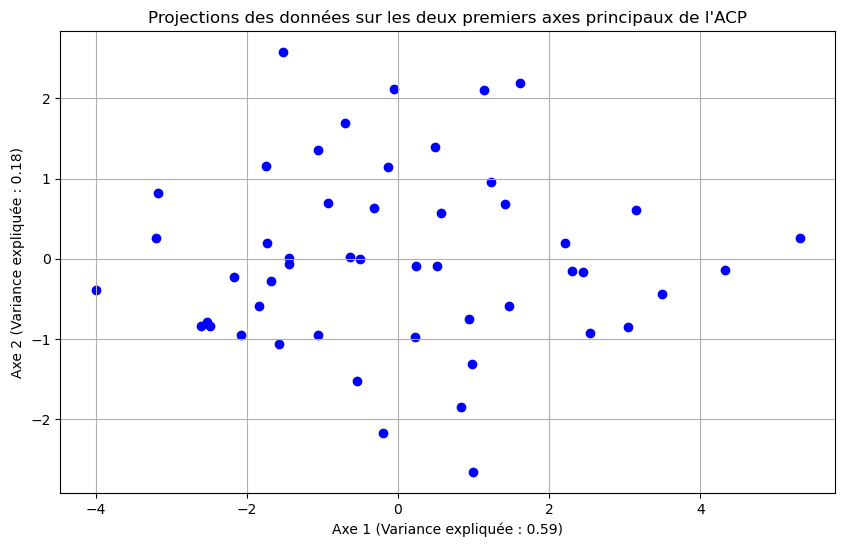

Nombre d'axes à retenir pour conserver 90% de la variance : 4


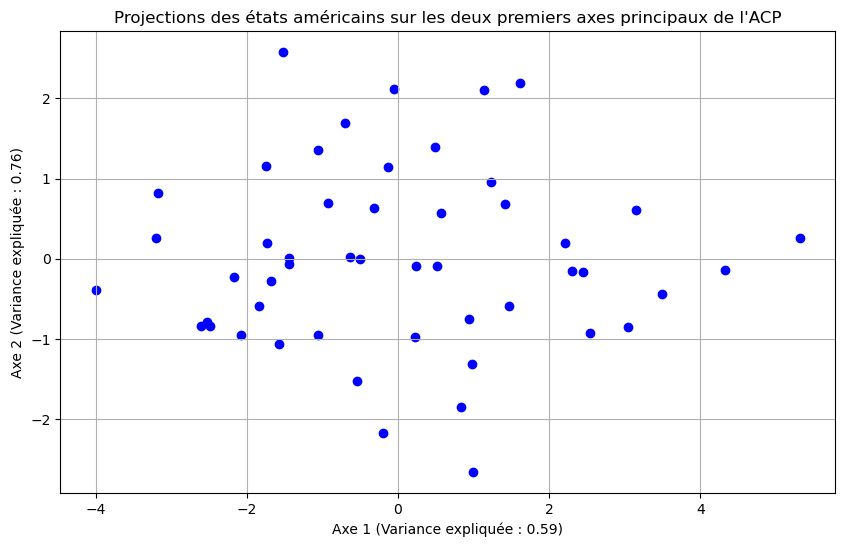

In [174]:
# 3) Jeu de données crimes

# Importer les bibliothèques nécessaires
import pandas as pd

# Charger le fichier "crimes.csv" (modifiez le chemin si nécessaire)
file_path = './crimes.csv'
data = pd.read_csv(file_path, sep=';')

# Afficher les premières lignes du fichier pour vérifier les données
print(data.head())

# Définir les colonnes correspondant aux types de crimes à analyser
columns_to_analyze = ['Meutre', 'Rapt', 'Vol', 'Attaque', 'Viol', 'Larcin', 'Auto_Theft']

# Appliquer la fonction analyse_pca définie précédemment
X_pca, variance_expliquée, axes_a_conserver = analyse_pca(data, columns_to_analyze)

# Afficher le nombre d'axes à retenir
print(f"Nombre d'axes à retenir pour conserver 90% de la variance : {axes_a_conserver}")

# Interprétation visuelle et analyse
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', label='Données projetées')
plt.title("Projections des états américains sur les deux premiers axes principaux de l'ACP")
plt.xlabel(f"Axe 1 (Variance expliquée : {variance_expliquée[0]:.2f})")
plt.ylabel(f"Axe 2 (Variance expliquée : {variance_expliquée[1]:.2f})")
plt.grid(True)
plt.show()


In [176]:
# Interpretation :
"""
Après avoir appliqué l'ACP sur les données de criminalité des états américains, voici ce que l'on peut observer :

Variance expliquée : Les deux premiers axes principaux capturent une grande partie de la variance dans
les données. Le premier axe pourrait représenter les états ayant des niveaux élevés de crimes violents
(meurtres, agressions), tandis que le deuxième axe pourrait capturer les états avec des niveaux plus
élevés de crimes comme le vol de voiture ou le larcin.

Regroupements visuels :
Axes principaux : Les états avec des profils criminels similaires se regroupent dans le plan projeté.
Par exemple, certains états comme Californie et Louisiane pourraient être proches sur le plan, ce qui
suggère des caractéristiques criminelles similaires.
Typologie des états : On peut visuellement distinguer plusieurs groupes d'états : certains avec une
forte criminalité violente, d'autres avec des taux plus faibles de crimes violents, et quelques états
présentant une criminalité mixte.
Donc oui, on peut visuellement identifier une typologie des états basée sur les types de crimes et leur fréquence.
"""

"\nAprès avoir appliqué l'ACP sur les données de criminalité des états américains, voici ce que l'on peut observer :\n\nVariance expliquée : Les deux premiers axes principaux capturent une grande partie de la variance dans\nles données. Le premier axe pourrait représenter les états ayant des niveaux élevés de crimes violents\n(meurtres, agressions), tandis que le deuxième axe pourrait capturer les états avec des niveaux plus\nélevés de crimes comme le vol de voiture ou le larcin.\n\nRegroupements visuels :\nAxes principaux : Les états avec des profils criminels similaires se regroupent dans le plan projeté.\nPar exemple, certains états comme Californie et Louisiane pourraient être proches sur le plan, ce qui\nsuggère des caractéristiques criminelles similaires.\nTypologie des états : On peut visuellement distinguer plusieurs groupes d'états : certains avec une\nforte criminalité violente, d'autres avec des taux plus faibles de crimes violents, et quelques états\nprésentant une criminal

   Id  Depenses R&D  Depenses Administration  Depenses Marketing Spend  \
0   1     165349.20                136897.80                 471784.10   
1   2     162597.70                151377.59                 443898.53   
2   3     153441.51                101145.55                 407934.54   
3   4     144372.41                118671.85                 383199.62   
4   5     142107.34                 91391.77                 366168.42   

    Benefice  
0  192261.83  
1  191792.06  
2  191050.39  
3  182901.99  
4  166187.94  
Nombre d'axes à retenir pour conserver 90.0% de la variance : 2


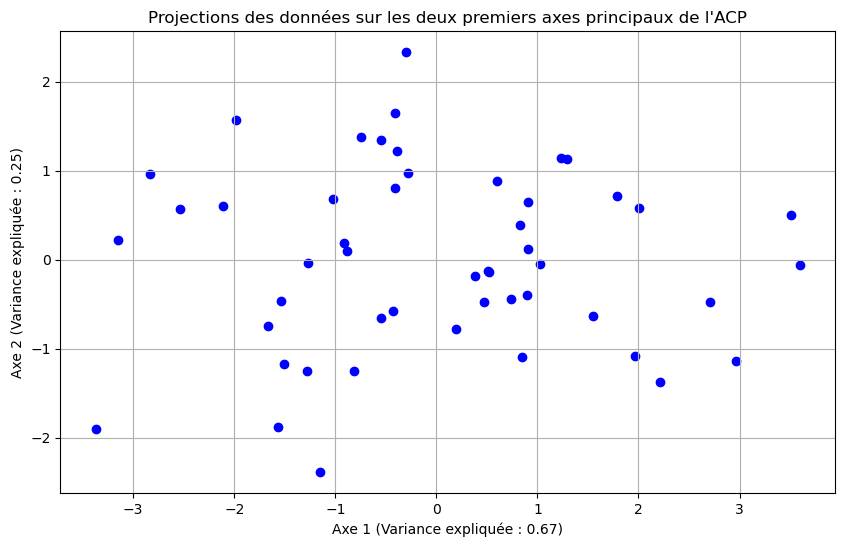

Nombre d'axes à retenir pour conserver 90% de la variance : 2


In [178]:
# 4) 50 startups

# Importer les bibliothèques nécessaires
import pandas as pd

# Charger le fichier "crimes.csv" (modifiez le chemin si nécessaire)
file_path = './50_Startups.csv'
data = pd.read_csv(file_path, sep=';')

# Afficher les premières lignes du fichier pour vérifier les données
print(data.head())

# Définir les colonnes correspondant aux types de crimes à analyser
columns_to_analyze = ['Depenses R&D', 'Depenses Administration', 'Depenses Marketing Spend', 'Benefice']

# Appliquer la fonction analyse_pca définie précédemment
X_pca, variance_expliquée, axes_a_conserver = analyse_pca(data, columns_to_analyze)

# Afficher le nombre d'axes à retenir
print(f"Nombre d'axes à retenir pour conserver 90% de la variance : {axes_a_conserver}")

In [180]:
# Interpretations:
"""
Pour le jeu de données 50 Startups, l'ACP révèle que deux axes principaux suffisent à expliquer 90% de la variance des données, ce qui montre qu'une projection dans un espace à deux dimensions capture l'essentiel des informations.
Interprétation :

Axe 1 : Lié aux dépenses globales (R&D et marketing), séparant les startups avec de fortes dépenses de celles avec de faibles dépenses.
Axe 2 : Relatif à la relation entre les dépenses administratives et les bénéfices, distinguant les startups rentables avec des dépenses modérées.

Typologie des startups :

Startups à faibles dépenses, hauts bénéfices : Efficaces et rentables.
Startups à fortes dépenses, faibles bénéfices : Peu efficaces, avec des coûts élevés pour des bénéfices modestes.
Startups équilibrées : Dépenses et bénéfices modérés.
"""

"\nPour le jeu de données 50 Startups, l'ACP révèle que deux axes principaux suffisent à expliquer 90% de la variance des données, ce qui montre qu'une projection dans un espace à deux dimensions capture l'essentiel des informations.\nInterprétation :\n\nAxe 1 : Lié aux dépenses globales (R&D et marketing), séparant les startups avec de fortes dépenses de celles avec de faibles dépenses.\nAxe 2 : Relatif à la relation entre les dépenses administratives et les bénéfices, distinguant les startups rentables avec des dépenses modérées.\n\nTypologie des startups :\n\nStartups à faibles dépenses, hauts bénéfices : Efficaces et rentables.\nStartups à fortes dépenses, faibles bénéfices : Peu efficaces, avec des coûts élevés pour des bénéfices modestes.\nStartups équilibrées : Dépenses et bénéfices modérés.\n"